In [35]:
## going to add sappyseals next
REACTIONS = 100
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
csfont = {"fontname":"Adobe Garamond Pro"}
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

/var/folders/pr/mw9ljf9s05z6rjnmbffllg6w0000gn/T/ipykernel_68525/2365447671.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', quality=100)


In [154]:
EXT = ".txt"
DATA_DIR = "PublicMetricsData"
TYPES = ["Likes", "Replies", "Retweets", "QuoteTweets"]

fs = glob.glob(DATA_DIR + "/*.txt")

sto = {}
for ii,fname in enumerate(fs):
  username = fname.replace(EXT,"").split("/")[1]
  with open(fname, "r") as fid:
    line = fid.read()
  # end with open
  sto[username] = {
     "dates":       [],
     "Replies":     [],
     "Likes":       [],
     "Retweets":    [],
     "QuoteTweets": []
     }
  stou = sto[username]

  stou["followers"] = int(float(line.split("followersCount=")[1].split(",")[0]))

  dates = line.split("date=datetime.datetime(")[1:]
  for date in dates:
    stou["dates"].append(date.split(", tzinfo=datetime.timezone.utc")[0])
  # end for dates

  data = line.split("label=None), replyCount")[1:]
  for datum in data:
    counts = datum.split("=")
    stou["Replies"    ].append(int(float(counts[1].split(",")[0].replace(" ",""))))
    stou["Retweets"   ].append(int(float(counts[2].split(",")[0].replace(" ",""))))
    stou["Likes"      ].append(int(float(counts[3].split(",")[0].replace(" ",""))))
    stou["QuoteTweets"].append(int(float(counts[4].split(",")[0].replace(" ",""))))
  # end for data
# end for usernames

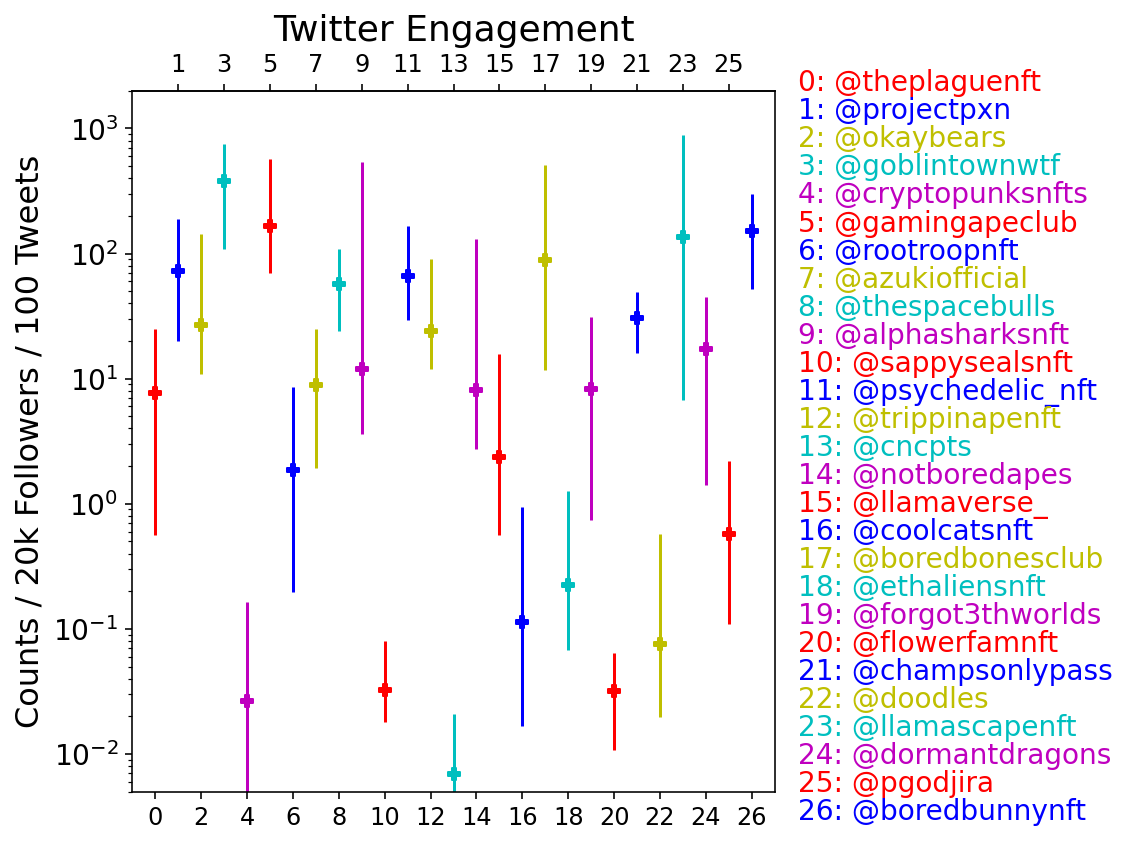

In [298]:
TYPES = ["Likes", "Replies", "Retweets", "QuoteTweets"]
OFFSET = 0.1
MULTIPLIER = [1,3,2,4]

YTI = 14
XTI = 12
LAB = 16
TIT = 18

colors = ["r", "b", "y", "c", "m"]

ys = [1e3, 6e2, 4e2, 1e2, 3e1, 1e1,   3,   1, 0.3, 0.1, 0.03,
      0.01]
ss = ["A", "B", "C", "D", "E", "F", "G", "H", "I",  "J",
      "K", "L", "M", "N", "O"]
#ys = np.logspace(0.01,1e3,len(ss))
ys = np.logspace(np.log10(3e-3),np.log10(2e3),len(fs))[::-1]

fig = plt.figure(figsize=(8,6))
usernames = []
xtickvals_bot = []
xtickvals_top = []
xticklabels_bot = []
xticklabels_top = []
str_ii = []
for ii,fname in enumerate(fs):
  str_ii.append(ii)
  color = colors[ii%len(colors)]
  #if ii == 4:
  #  continue
  username = fname.replace(EXT,"").split("/")[1]

  stou = sto[username]
  usernames.append("@" + username)

  num_tweets = len(np.array(stou["dates"]))
  points = np.zeros(num_tweets)
  for jj in range(len(TYPES)):
    vals = stou[TYPES[jj]]
    if len(vals) < num_tweets:
      vals = vals + [0]*(num_tweets - len(vals))
    # end if
    points += np.array(vals) * MULTIPLIER[jj]
  # end for
  points = points / float(stou["followers"]) * 2e4 / float(num_tweets) * 100
  med = np.median(points)
  ymin,ymax = np.percentile(points, [25,75])

  if ii % 2 == 0:
    xtickvals_bot.append(ii)
    #xticklabels_bot.append(usernames[-1])
    xticklabels_bot.append(str(ii))
  else:
    xtickvals_top.append(ii)
    xticklabels_top.append(str(ii))
    #xticklabels_top.append(usernames[-1])
    
  plt.scatter(ii, med, c=color, marker=markers[jj])
  plt.vlines( ii, ymin=ymin, ymax=ymax, color=color)
  if ii in [0,2,5,7,8,10,12,14,16,18,20,22,24,26]:
    y = ymin
  else:
    y = ymax
  #if ii == 0:
  #  y = 3e-3
  if ii == 0:
    x = len(fs)+1
    y = 1e3
    s = "A: @" + username
  elif ii == 1:
    s = "B: @" + username
  s = str(ii) + ": @" + username
  plt.text(x=len(fs)+1, y=ys[ii], s=s, fontsize=14, color=color)
  #if ii > 2:
  #  break
# end for
plt.title("Twitter Engagement",fontsize=TIT)
plt.ylabel("Counts / 20k Followers / 100 Tweets",fontsize=LAB)
plt.yticks(fontsize=YTI)
plt.yscale("log")
plt.xticks(xtickvals_bot, xticklabels_bot, fontsize=XTI)
#plt.xticks(np.arange(len(str_ii)), str_ii, fontsize=XTI)
#plt.xticks(np.arange(len(ss)), ss, fontsize=XTI)
#plt.xticks([], fontsize=XTI)
plt.ylim(5e-3,2e3)
plt.xlim(-1,len(fs))

ax = plt.gca()
axT = ax.secondary_xaxis("top")

axT.set_xticks(xtickvals_top)
axT.set_xticklabels(xticklabels_top, fontsize=XTI)

#plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor" ) 
#plt.setp( axT.xaxis.get_majorticklabels(), rotation=45, ha="left", rotation_mode="anchor" ) 
plt.tight_layout()

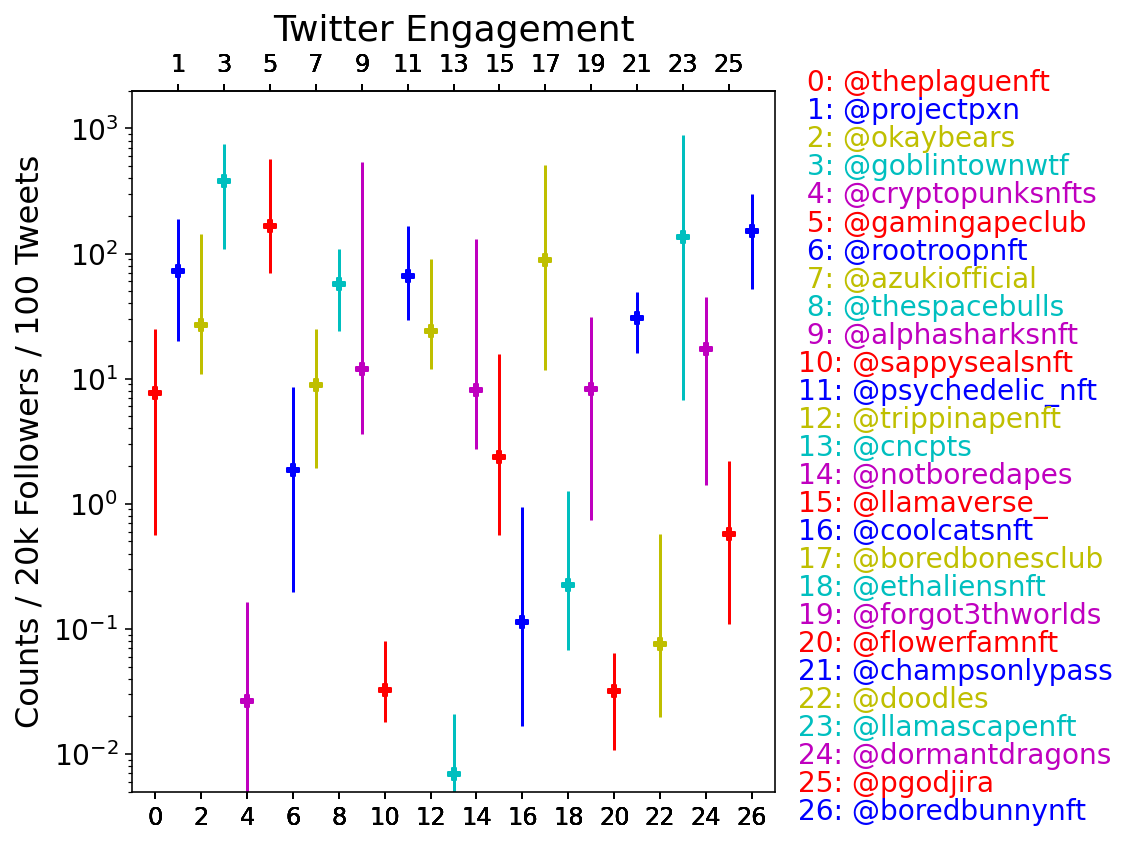

In [345]:
TYPES = ["Likes", "Replies", "Retweets", "QuoteTweets"]
OFFSET = 0.1
MULTIPLIER = [1,3,2,4]

YTI = 14
XTI = 12
LAB = 16
TIT = 18

ys = np.logspace(np.log10(3e-3),np.log10(2e3),len(fs))[::-1]

fig = plt.figure(figsize=(8,6))
usernames = []
colors = [
    "#641E16",
    "#7B241C", #2
    "#922B21", #3
    "#A93226", #4
    "#C0392B", #5
    "#CD6155", #6
    "#D98880", #7
    "#E6B0AA", #8
    "#F2D7D5", #9
    "#F9EBEA", #10
    "#EAF2F8", #11
    "#D4E6F1", #12
    "#A9CCE3", #13
    "#7FB3D5", #14
    "#5499C7", #15
    "#2980B9", #16
    "#2471A3", #17
    "#1F618D", #18
    "#1A5276", #19
    "#154360", #20
    "#424949", #21
    "#515A5A", #22
    "#616A6B", #23
    "#707B7C", #24
    "#7F8C8D", #25
    "#99A3A4", #26
    "#B2BABB", #27
]
colors = ["r", "b", "y", "c", "m"]
for ii,fname in enumerate(fs):
  #color = colors[ii]
  color = colors[ii%len(colors)]
  username = fname.replace(EXT,"").split("/")[1]

  stou = sto[username]
  usernames.append("@" + username)

  num_tweets = len(np.array(stou["dates"]))
  points = np.zeros(num_tweets)
  for jj in range(len(TYPES)):
    vals = stou[TYPES[jj]]
    if len(vals) < num_tweets:
      vals = vals + [0]*(num_tweets - len(vals))
    # end if
    points += np.array(vals) * MULTIPLIER[jj]
  # end for
  points = points / float(stou["followers"]) * 2e4 / float(num_tweets) * 100
  med = np.median(points)
  ymin,ymax = np.percentile(points, [25,75])

  if ii % 2 == 0:
    xtickvals_bot.append(ii)
    xticklabels_bot.append(str(ii))
  else:
    xtickvals_top.append(ii)
    xticklabels_top.append(str(ii))
  # end if/else
    
  plt.scatter(ii, med, c=color, marker=markers[jj])
  plt.vlines( ii, ymin=ymin, ymax=ymax, color=color)
  plt.text(x=len(fs)+1, y=ys[ii], s=str(ii).rjust(2) + ": @" + username, 
           fontsize=14, color=color)
# end for
plt.title("Twitter Engagement",fontsize=TIT)
plt.ylabel("Counts / 20k Followers / 100 Tweets",fontsize=LAB)
plt.yticks(fontsize=YTI)
plt.yscale("log")
plt.xticks(xtickvals_bot, xticklabels_bot, fontsize=XTI)
plt.ylim(5e-3,2e3)
plt.xlim(-1,len(fs))

ax = plt.gca()
axT = ax.secondary_xaxis("top")

axT.set_xticks(xtickvals_top)
axT.set_xticklabels(xticklabels_top, fontsize=XTI)

plt.tight_layout()

In [303]:
print(str(1).rjust(2))
print(str(10
         
         
         ).rjust(2))

 1
10


In [306]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')

inds = np.logspace(0,1, len(fs))
cmap(inds[0])

(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)

In [315]:
color = matplotlib.colors.rgb2hex(cmap(0))
color

'#9e0142'

In [316]:
color = matplotlib.colors.rgb2hex(cmap(1))
color

'#a00343'

In [328]:
cmap = matplotlib.cm.get_cmap('RdBu')
matplotlib.colors.rgb2hex(cmap(0))

'#67001f'

In [329]:
matplotlib.colors.rgb2hex(cmap(1))

'#6a011f'

In [121]:
## going to add sappyseals next
import os
import numpy as np

sto = {"dates":[]}
fname = "at_rootroopnft.txt"
with open(fname, "r") as fid:
    line = fid.read()
# end with open

In [8]:
tweets = line.split("Tweet(url=")
print("num_tweets: ", len(tweets))

num_tweets:  164890


In [172]:
## doing this all at once is v slow b/c of building up the arrays
## for some reason it's faster to do it one at a time :D
sto["tweet_creation_times"] = []
for jj,tweet in enumerate(tweets[1:]):
    if jj % 10000 == 0:
        print(jj)
    date = tweet.split("date=datetime.datetime(")[1]
    date = date.split(", tzinfo=datetime.timezone.utc")[0]
    arr = date.split(",")
    
    for ii,el in enumerate(arr):
        arr[ii] = el.replace(" ", "")
        if ii != 0:
            arr[ii] = arr[ii].zfill(2)
    # end for ii
    
    if len(arr) == 6:
        yy,mm,dd,HH,MM,SS = arr[:]
    else:
        yy,mm,dd,HH,MM = arr[:]
        SS = "00"
    # end if/else    
    
    date = yy + "-" + mm + "-" + dd + "T" + HH + ":" + MM + ":" + SS + ".000Z"
    sto["tweet_creation_times"].append(date)
# end for tweets
print("len(sto[tweet_creation_times]: ", len(sto["tweet_creation_times"]))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200
147300
147400
147500
147600
147700
147800
147900
148000
148100
148200
148300

In [175]:
## doing this all at once is v slow b/c of building up the arrays
## for some reason it's faster to do it one at a time :D
sto["tweet_ids"] = []
for jj,tweet in enumerate(tweets[1:]):
    if jj % 10000 == 0:
        print(jj)
    # end if
    
    status = tweet.split("/status/")[1]
    sto["tweet_ids"].append(status.split("',")[0])    
# end for tweets
print("len(sto[tweet_creation_times]: ", len(sto["tweet_creation_times"]))
print("len(sto[tweet_contents]: ", len(sto["tweet_contents"]))
print("len(sto[usernames]: ",      len(sto["usernames"]))
print("len(sto[user_ids]: ",       len(sto["user_ids"]))
print("len(sto[tweet_ids]: ",      len(sto["tweet_ids"]))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
len(sto[tweet_creation_times]:  164889
len(sto[tweet_contents]:  0
len(sto[usernames]:  0
len(sto[user_ids]:  0
len(sto[tweet_ids]:  164889


In [176]:
## doing this all at once is v slow b/c of building up the arrays
## for some reason it's faster to do it one at a time :D
sto["usernames"] = []
for jj,tweet in enumerate(tweets[1:]):
    if jj % 10000 == 0:
        print(jj)
    # end if
    
    username = tweet.split("https://twitter.com")[1]
    sto["usernames"].append(username.split("/status/")[0][1:])    
# end for tweets
print("len(sto[tweet_creation_times]: ", len(sto["tweet_creation_times"]))
print("len(sto[tweet_contents]: ", len(sto["tweet_contents"]))
print("len(sto[usernames]: ",      len(sto["usernames"]))
print("len(sto[user_ids]: ",       len(sto["user_ids"]))
print("len(sto[tweet_ids]: ",      len(sto["tweet_ids"]))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
len(sto[tweet_creation_times]:  164889
len(sto[tweet_contents]:  0
len(sto[usernames]:  164889
len(sto[user_ids]:  0
len(sto[tweet_ids]:  164889


In [177]:
## doing this all at once is v slow b/c of building up the arrays
## for some reason it's faster to do it one at a time :D
sto["user_ids"] = []
for jj,tweet in enumerate(tweets[1:]):
    if jj % 10000 == 0:
        print(jj)
    # end if
    
    idn = tweet.split(", user=User(username='")[1]
    idn = idn.split(", displayname=")[0]
    idn = idn.split("id=")[1]
    sto["user_ids"].append(idn)    
# end for tweets
print("len(sto[tweet_creation_times]: ", len(sto["tweet_creation_times"]))
print("len(sto[tweet_contents]: ", len(sto["tweet_contents"]))
print("len(sto[usernames]: ",      len(sto["usernames"]))
print("len(sto[user_ids]: ",       len(sto["user_ids"]))
print("len(sto[tweet_ids]: ",      len(sto["tweet_ids"]))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
len(sto[tweet_creation_times]:  164889
len(sto[tweet_contents]:  0
len(sto[usernames]:  164889
len(sto[user_ids]:  164889
len(sto[tweet_ids]:  164889


In [181]:
## doing this all at once is v slow b/c of building up the arrays
## for some reason it's faster to do it one at a time :D
sto["tweet_contents"] = []
for jj,tweet in enumerate(tweets[1:]):
    if jj % 1000 == 0:
        print(jj)
    # end if
    
    content = tweet.split("content=")[1]
    sto["tweet_contents"].append(content.split("renderedContent")[0])
# end for tweets
print("len(sto[tweet_creation_times]: ", len(sto["tweet_creation_times"]))
print("len(sto[tweet_contents]: ", len(sto["tweet_contents"]))
print("len(sto[usernames]: ",      len(sto["usernames"]))
print("len(sto[user_ids]: ",       len(sto["user_ids"]))
print("len(sto[tweet_ids]: ",      len(sto["tweet_ids"]))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [123]:
## next, grab the tweet_ids
sto["tweet_ids"] = []
statuses = line.split("/status/")[1:]
for status in statuses:
    sto["tweet_ids"].append(status.split("',")[0])
# end for statuses
statuses = []

In [125]:
## next grab the usernames
sto["usernames"] = []
usernames = line.split("https://twitter.com")[1:]
for username in usernames:
    sto["usernames"].append(username.split("/status/")[0][1:])
# end for usernames
usernames = []

In [139]:
## next, grab their twitter user id (2nd id)
ids = line.split(", user=User(username='")[1:]

In [147]:
sto["user_ids"] = []
#ids = line.split("id=")
for ii,idn in enumerate(ids):
    idn = idn.split(", displayname=")[0]
    idn = idn.split("id=")[1]
    sto["user_ids"].append(idn)
# end for

In [93]:
## next, grab their twitter user id (2nd id)
contents = line.split("content=")[1:]

In [127]:
## next, grab the tweet contents (idk why...)
sto["tweet_contents"] = []
contents = line.split("content=")[1:]
for content in contents:
    content = content.split("renderedContent")[0]
    ii += 1
    sto["tweet_contents"].append(content[1:-2])
# end for contents

In [142]:
import ast
with open("../twitter_data/activity_by_user.json", "r") as fid:
    line2 = fid.read()
# end with open
line2 = ast.literal_eval(line2)

In [143]:
activity_by_user = line2

In [100]:
sto.keys()

dict_keys(['usernames', 'tweet_ids', 'tweet_creation_times', 'user_ids', 'tweet_contents'])

In [46]:
activity_by_user["1464250575931981854"].keys()

dict_keys(['usernames', 'num_keyword_replies', 'num_keyword_retweets', 'tweet_ids', 'tweet_contents', 'tweet_creation_times', 'Likes', 'Replies', 'Retweets', 'QuoteTweets'])

In [130]:
num_ids = len(sto["user_ids"])

In [112]:
special_tweeters = {"1447280926967304195":"rootroopnft",
                    "1477912158730170370":"troopsales"}

for ii in range(num_ids):
    print("ii: ", ii)
    
    uid     = sto["user_ids"      ][ii]
    twid    = sto["tweet_ids"     ][ii]    
    un      = sto["usernames"     ][ii]
    content = sto["tweet_contents"][ii]

    print("uid: ",   uid)
    print("twid: ", twid)
    print("un: ", un)
    print("content: ", content)
    input(">>")
    
    if uid in special_tweeters.keys():
        print("uid in special tweeters")
        continue
    # end if
    
    if uid not in activity_by_user.keys():
        # then it's a pain :D
        print("uid not in abu!")
        break
    else:
        abu = activity_by_user[uid]
        
        if twid in abu["tweet_ids"]:
            print("twid in twids so continuing")
            continue
        # end if
    # end if
    abu["tweet_ids"].append(twid)
    print("abu last 2 twids: ", abu["tweet_ids"][-2:])
    abu["tweet_ids"] = list(set(abu["tweet_ids"]))
    print()
    print("abu twids: ", abu["tweet_ids"])
    
    if un not in abu["usernames"]:
        print("added username!")
        print("un: ", un)
        abu["usernames"].append(un)
        print("abu last 2 usernames: ", abu["usernames"][-2:])
    # end if
    abu["usernames"] = list(set(abu["usernames"]))
    print()
    print("abu usernames: ", abu["usernames"])
    
    if content[:3] == "RT ":
        abu["num_keyword_retweets"] += 1
    else:
        abu["num_keyword_replies"]  += 1
    # end if/else
    abu["tweet_contents"].append(content)
    print("abu last 2 tweet contents: ", abu["tweet_contents"][-2:])
    abu["tweet_contents"]= list(set(abu["tweet_contents"]))
    print()
    print("abu tweet contents: ", abu["tweet_contents"])

    abu["tweet_creation_times"].append(sto["tweet_creation_times"][ii])
    print("abu last 2 tweet creation times: ", abu["tweet_creation_times"][-2:])
    abu["tweet_creation_times"] = list(set(abu["tweet_creation_times"]))
    print()
    print("abu tweet creation times: ", abu["tweet_creation_times"])
    print
# end for

ii:  0
uid:  2382209412
twid:  152807138595991552
un:  kanoravalji
content:  @CodyOrlove Feel free to post on @RooTroopNFT &amp; @MorganStoneee job marketplace!'
>>
twid in twids so continuing
ii:  1
uid:  1286304329025097729
twid:  152806868002168422
un:  SchmRdty
content:  @Atx_Dubstep @MorganStoneee @RooTroopNFT 😅 part of the non-gang but I gave it a heart anyway'
>>
twid in twids so continuing
ii:  2
uid:  1457476824691195905
twid:  152806777648449945
un:  TravelTalkFYI
content:  @Sunnyvale_NFTs @RooTroopNFT My favorite is glitch. Least favorite is goldfish eyes.'
>>
abu last 2 twids:  ['1528246293734096897', '152806777648449945']

abu twids:  ['1506321558268104706', '1494862932299059202', '152806777648449945', '1515906959391993856', '1492300637861605378', '1514347699239194624', '1517243019392524288', '1496265875179327488', '1525237442340528128', '1528067776484499456', '1492958160012808193', '1524906858783248384', '1505258136994648065', '1525704004491018240', '1515770522398715907',

KeyboardInterrupt: Interrupted by user

In [108]:
uid = "2382209412"
abu = activity_by_user[uid]
un = sto["usernames"     ][ii]
list(set(abu["usernames"]))

['kanoravalji']

In [ ]:
special_tweeters = {"1447280926967304195":"rootroopnft",
                    "1477912158730170370":"troopsales"}

for ii in range(num_ids):
    print("ii: ", ii)
    
    uid     = sto["user_ids"      ][ii]
    twid    = sto["tweet_ids"     ][ii]    
    un      = sto["usernames"     ][ii]
    content = sto["tweet_contents"][ii]
    
    if uid in special_tweeters.keys():
        print("uid in special tweeters")
        continue
    # end if
    
    if uid not in activity_by_user.keys():
        # then it's a pain :D
        print("uid not in abu!")
        activity_by_user[uid] = \
              {"usernames": [],
               "num_keyword_replies": 0,
               "num_keyword_retweets": 0,
               "tweet_ids": [],
               "tweet_contents": [],
               "tweet_creation_times": [],
               "Likes": {"num_Likes": 0, "tweet_ids": [], "tweet_creation_times": []},
               "Retweets": {"num_Retweets": 0, "tweet_ids": [], "tweet_creation_times": []},
               "QuoteTweets": {"num_QuoteTweets": 0, "tweet_ids": [], "tweet_creation_times": [], "tweet_contents": []},
               "Replies": {"num_Replies": 0, "tweet_ids": [], "tweet_creation_times": [], "tweet_contents": []}
              }
    else:
        abu = activity_by_user[uid]
        
        if twid in abu["tweet_ids"]:
            print("twid in twids so continuing")
            continue
        # end if
    # end if
    abu["tweet_ids"].append(twid)
    abu["tweet_ids"] = list(set(abu["tweet_ids"]))
    
    if un not in abu["usernames"]:
        print("added username!")
        print("un: ", un)
        abu["usernames"].append(un)
        print("abu last 2 usernames: ", abu["usernames"][-2:])
        print("uid: ", uid)
        print("twid: ", twid)
        print("content: ", content)
        print("tweets[ii+1]: ", tweets[ii+1])
        print()
        input(">>")
    # end if
    abu["usernames"] = list(set(abu["usernames"]))
    
    if content[:3] == "RT ":
        abu["num_keyword_retweets"] += 1
    else:
        abu["num_keyword_replies"]  += 1
    # end if/else
    abu["tweet_contents"].append(content)
    abu["tweet_contents"]= list(set(abu["tweet_contents"]))

    abu["tweet_creation_times"].append(sto["tweet_creation_times"][ii])
    abu["tweet_creation_times"] = list(set(abu["tweet_creation_times"]))
# end for

ii:  0
twid in twids so continuing
ii:  1
twid in twids so continuing
ii:  2
twid in twids so continuing
ii:  3
twid in twids so continuing
ii:  4
twid in twids so continuing
ii:  5
twid in twids so continuing
ii:  6
twid in twids so continuing
ii:  7
twid in twids so continuing
ii:  8
twid in twids so continuing
ii:  9
twid in twids so continuing
ii:  10
twid in twids so continuing
ii:  11
twid in twids so continuing
ii:  12
twid in twids so continuing
ii:  13
twid in twids so continuing
ii:  14
twid in twids so continuing
ii:  15
twid in twids so continuing
ii:  16
twid in twids so continuing
ii:  17
twid in twids so continuing
ii:  18
twid in twids so continuing
ii:  19
twid in twids so continuing
ii:  20
twid in twids so continuing
ii:  21
twid in twids so continuing
ii:  22
twid in twids so continuing
ii:  23
twid in twids so continuing
ii:  24
twid in twids so continuing
ii:  25
twid in twids so continuing
ii:  26
twid in twids so continuing
ii:  27
twid in twids so continuing
ii

In [155]:
print(uid)
print(twid)
print(un)
print(content)
print(activity_by_user[uid]["usernames"])
print(activity_by_user[uid]["tweet_ids"][-2:])

1184905467354632192
1528020121272344579
boxpi3
@RaritySniperNFT @RooTroopNFT all the way. To be sleeping on this project is booking a first class ticket aboard the ngmi train. Rooty Roo to all https://t.co/iBeAQgkoMq'
['Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', 'Atx_Dubstep', '

In [154]:
activity_by_user[uid]["tweet_ids"] = activity_by_user[uid]["tweet_ids"][:-1]
activity_by_user[uid]["usernames"] = activity_by_user[uid]["usernames"][:-1]

In [152]:
uid

'1035476226524291072'

In [160]:
print(len(sto["user_ids"      ]))
print(len(sto["tweet_ids"     ]))
print(len(sto["usernames"     ]))
print(len(sto["tweet_contents"]))
print(len(sto["tweet_creation_times"]))

164889
167635
168747
164892
164889


In [159]:
len(tweets)

164890

In [168]:
print("sto[tcts]0: ", sto["tweet_creation_times"][-3])

sto[tcts]0:  2021-11-23T23:32:06.000Z
